### Name: Zijian Wang
### Email: wangziji@marshall.usc.edu

In [42]:
# For Data Manipulation
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_context('poster')
%matplotlib inline

# Not showing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [43]:
# Load the data
df_train=pd.read_csv('train.csv',index_col='Id')
df_test=pd.read_csv('test.csv',index_col='Id')
# Combine Training and Testing Data
df=pd.concat([df_train.drop(['SalePrice'],axis=1),df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Explanatory Data Analysis (EDA) on the Training Set

In [44]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


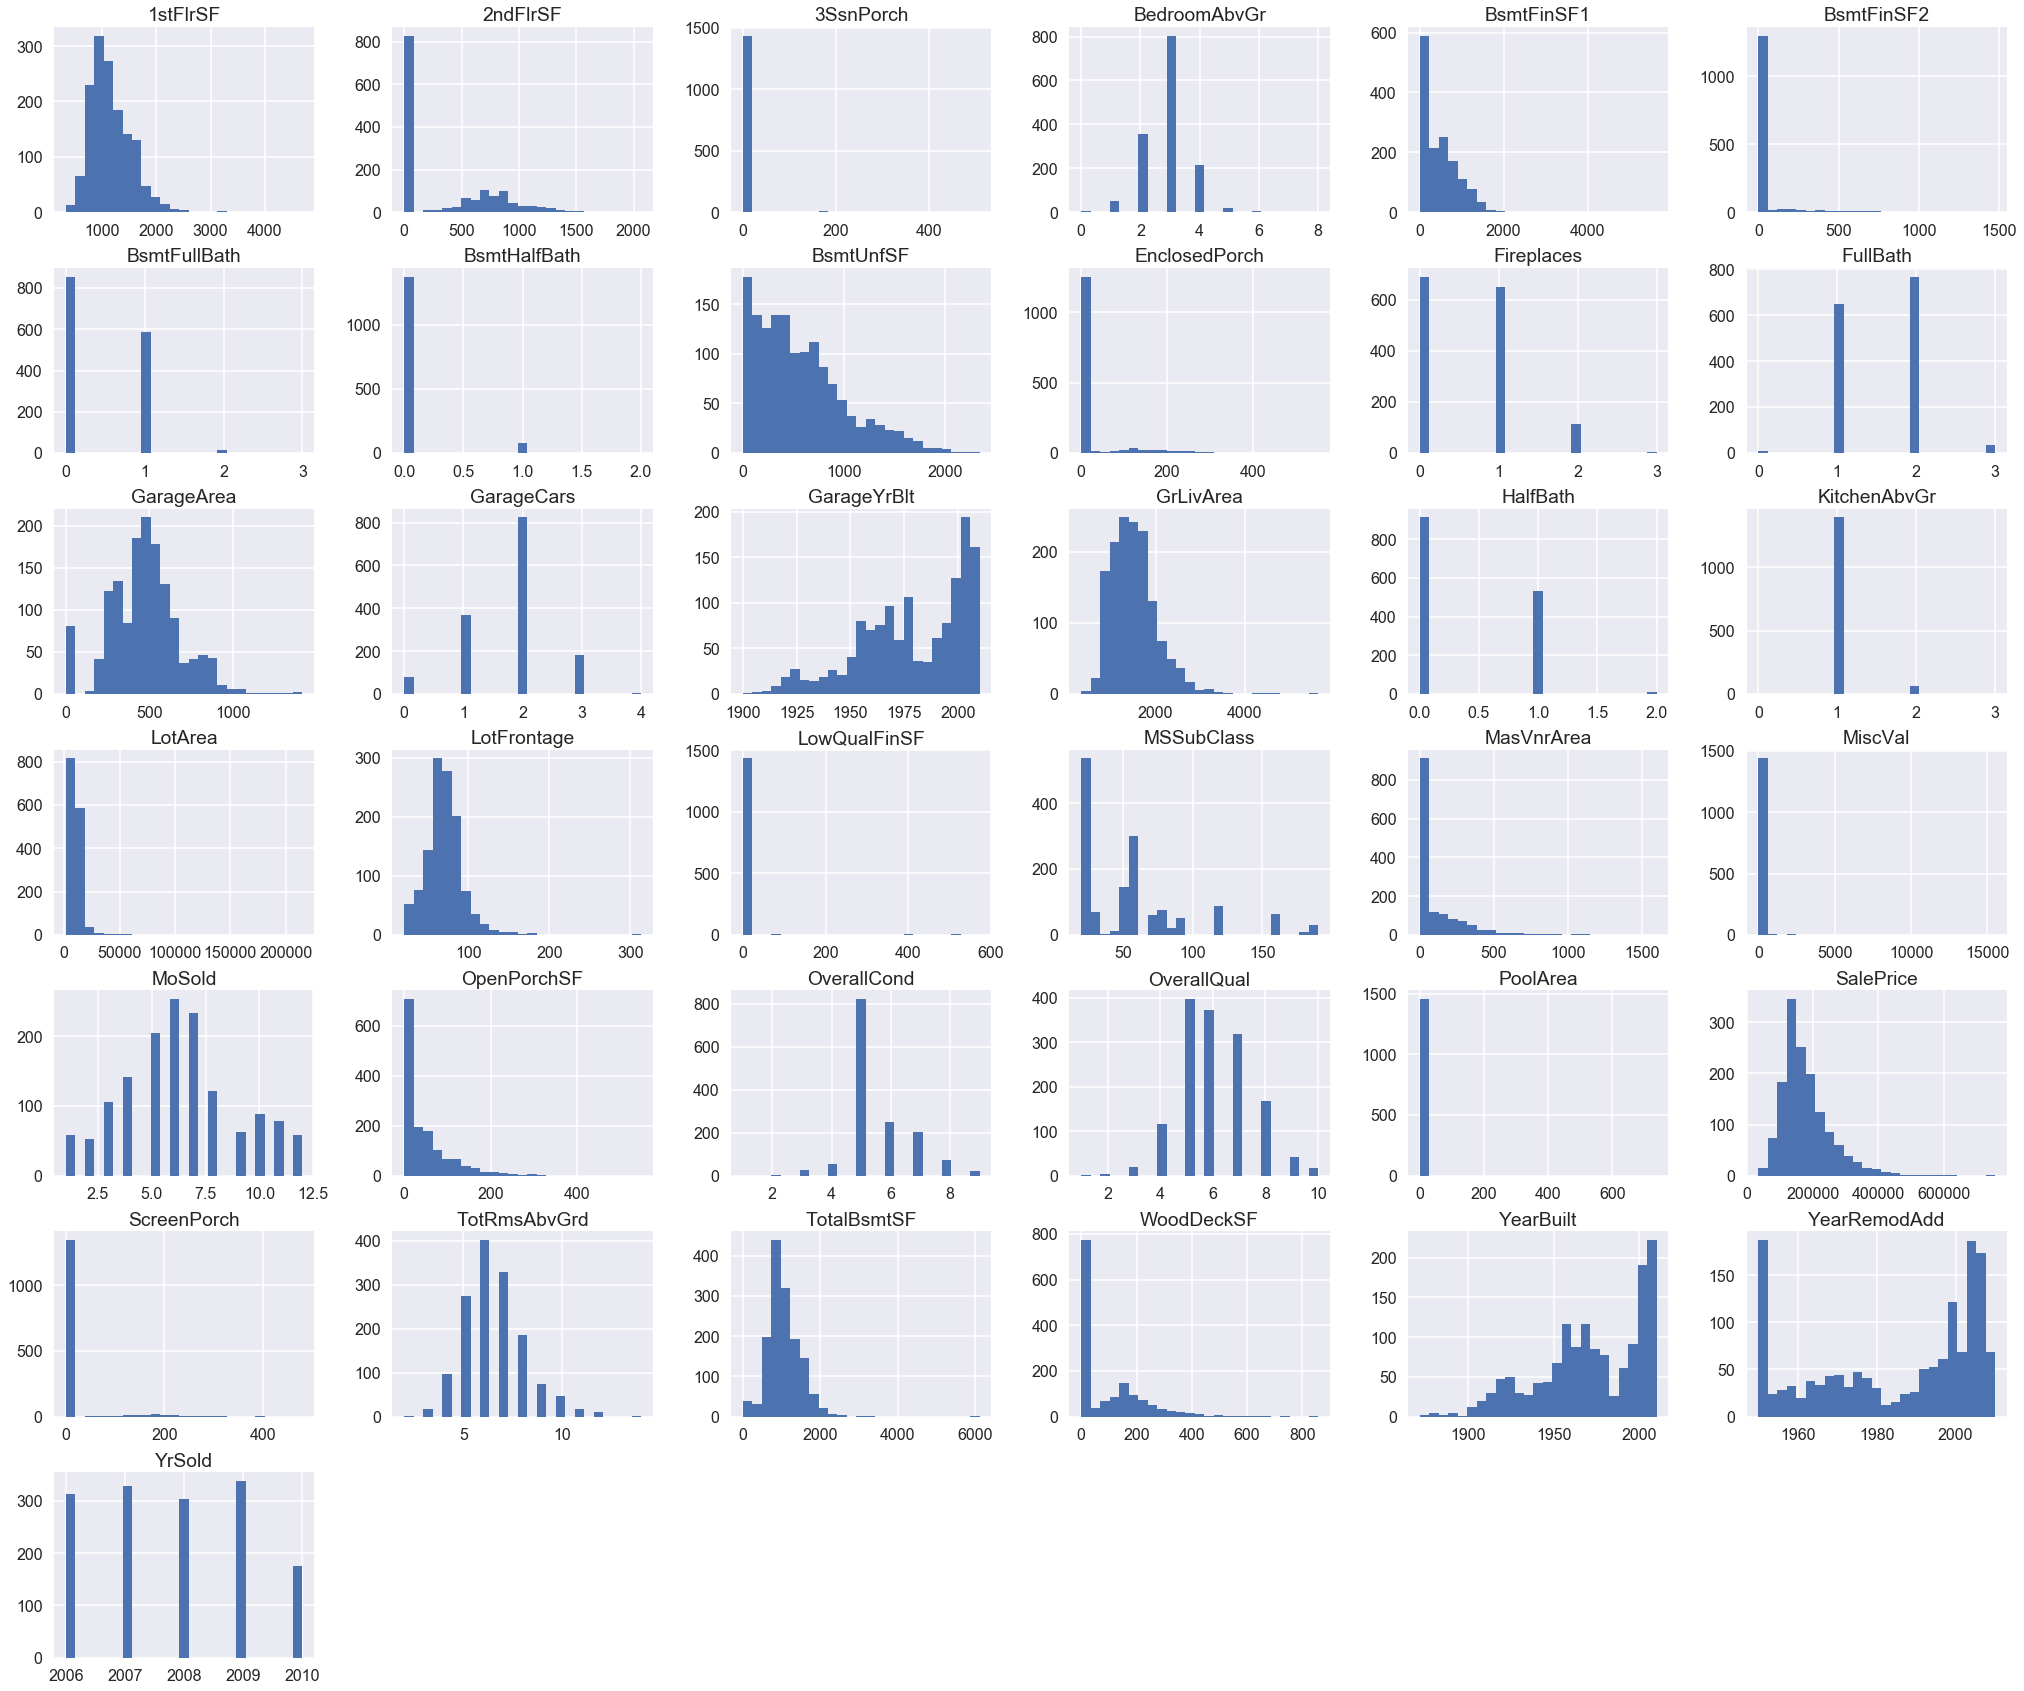

In [45]:
# For Numerical Features or Facotors
df_train.hist(figsize=(35,30),bins=25)
plt.show()

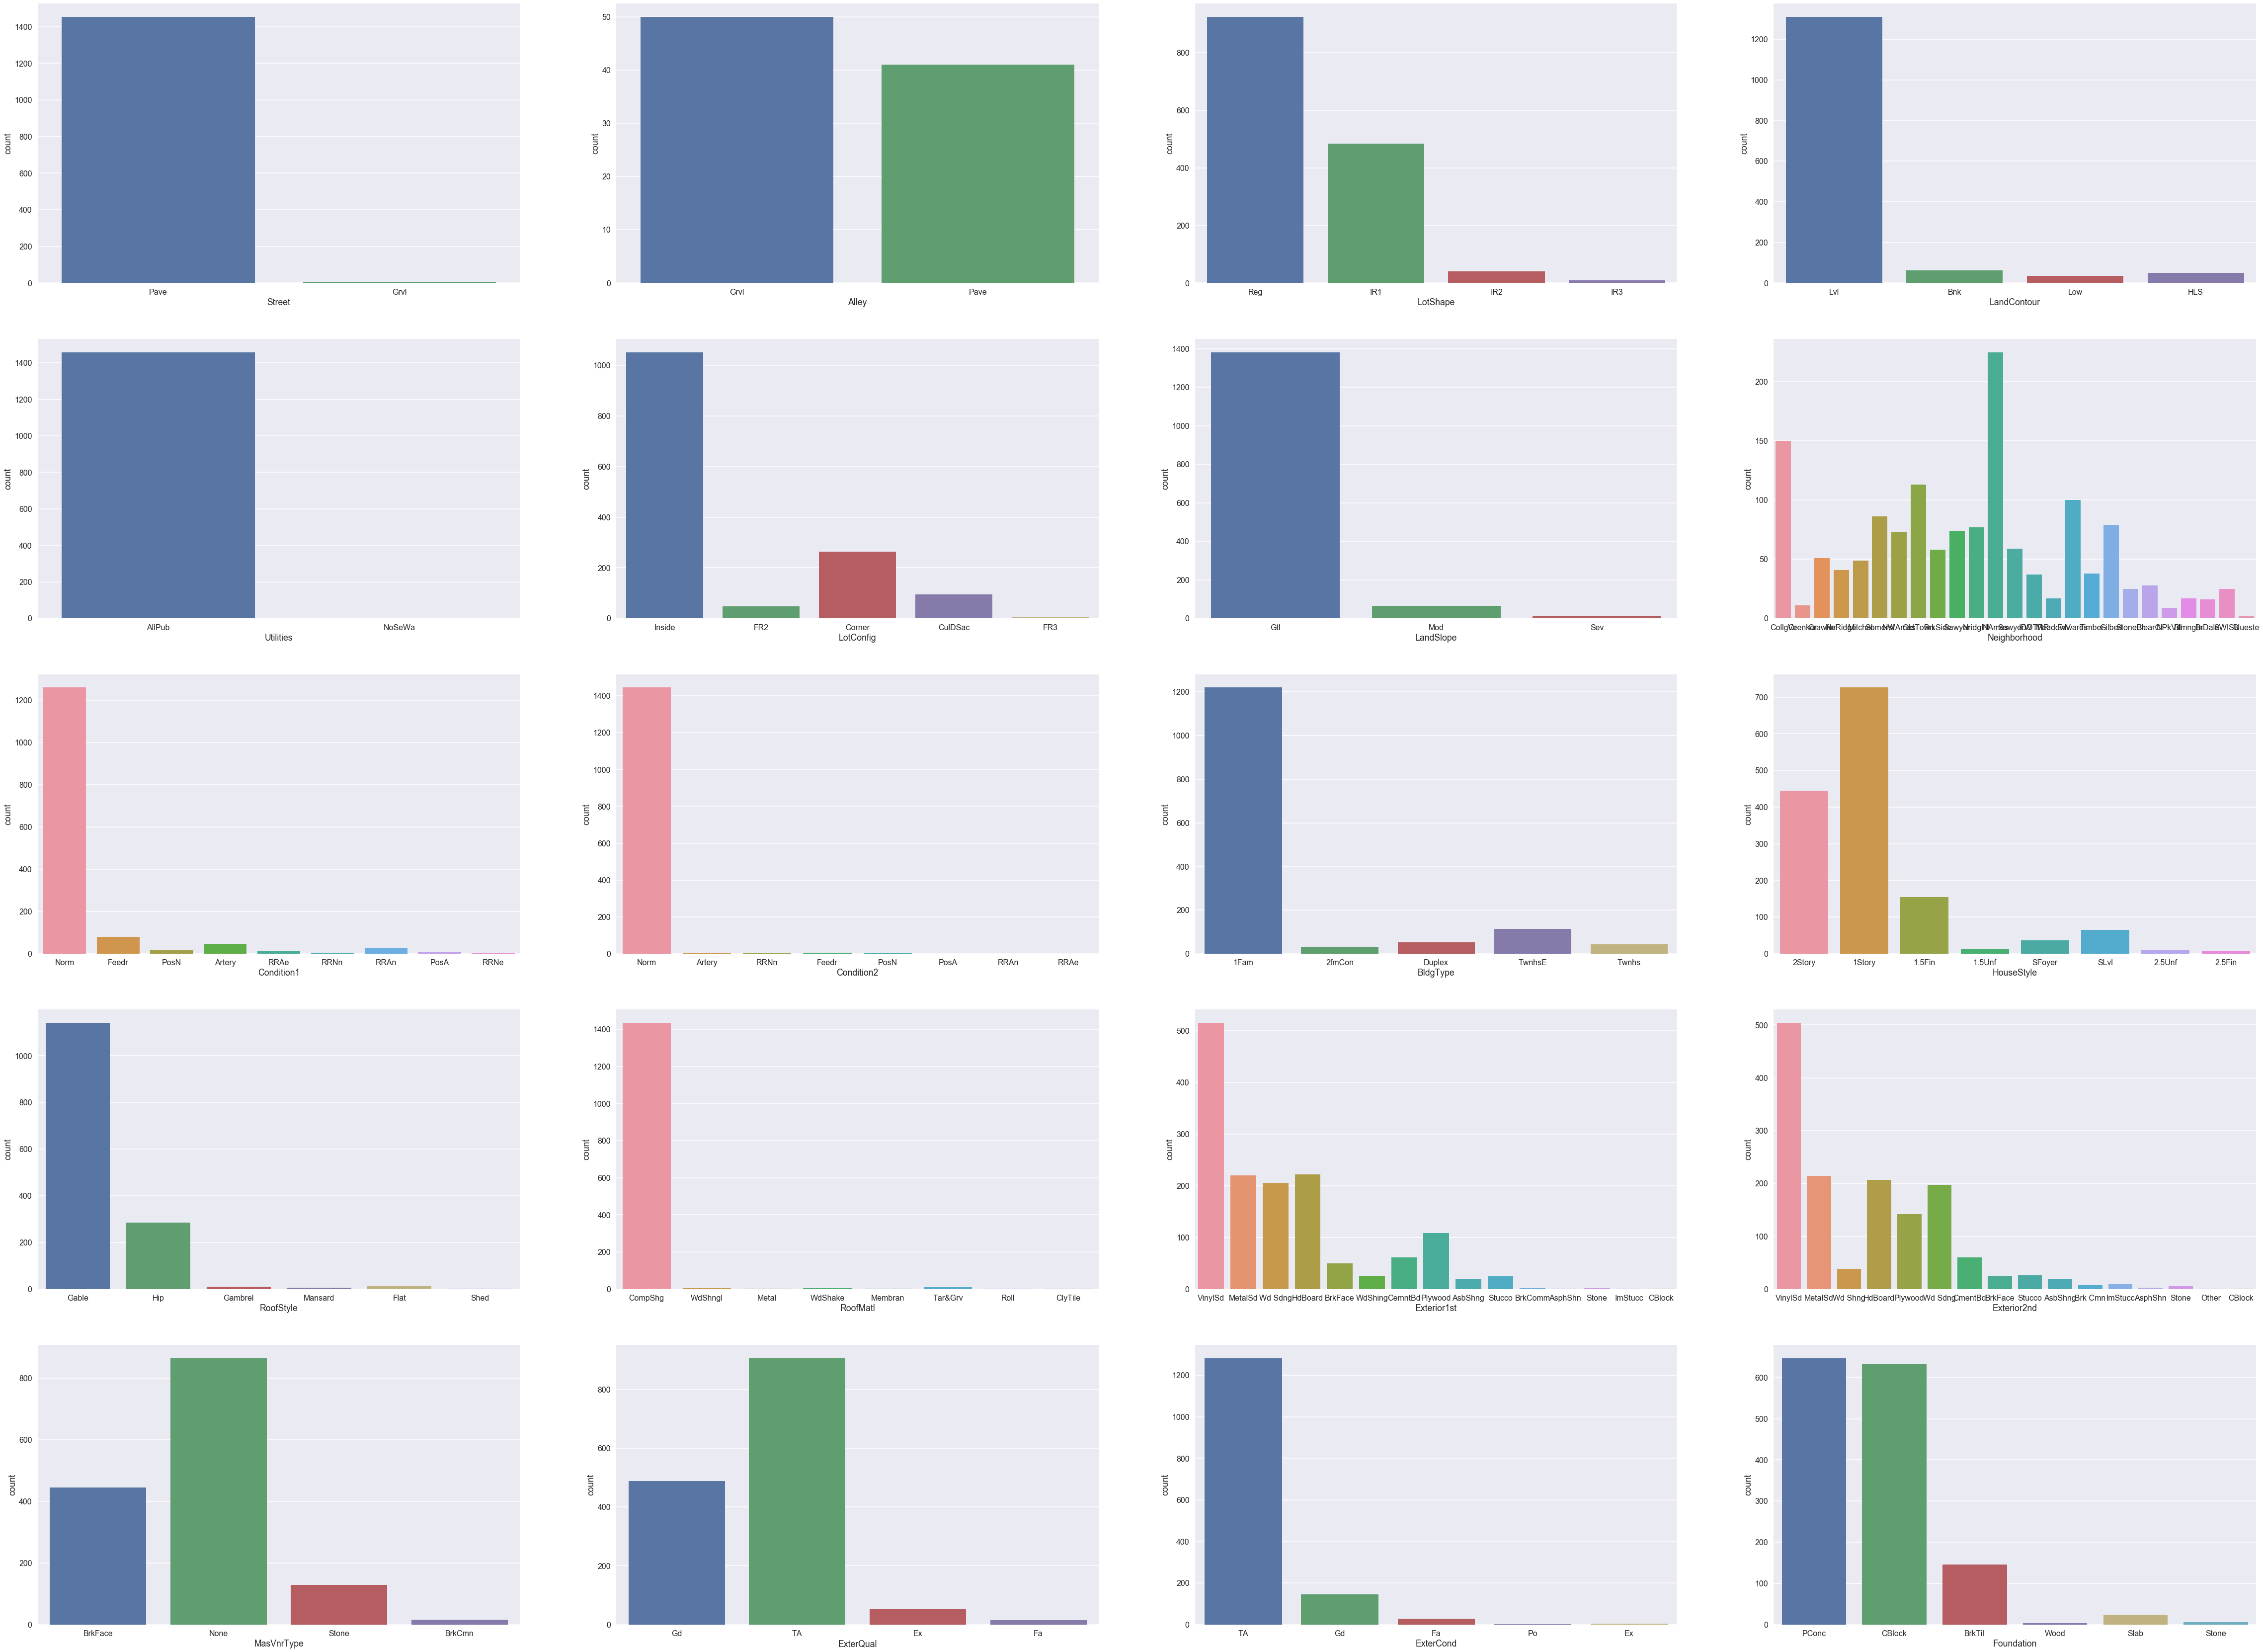

In [46]:
# For Categorical Data
df_categorical=df_train.select_dtypes('object')
plt.figure(figsize=(80,60))
for i in range(1,21):
    plt.subplot(5,4,i)
    sns.countplot(df_categorical.iloc[:,i])

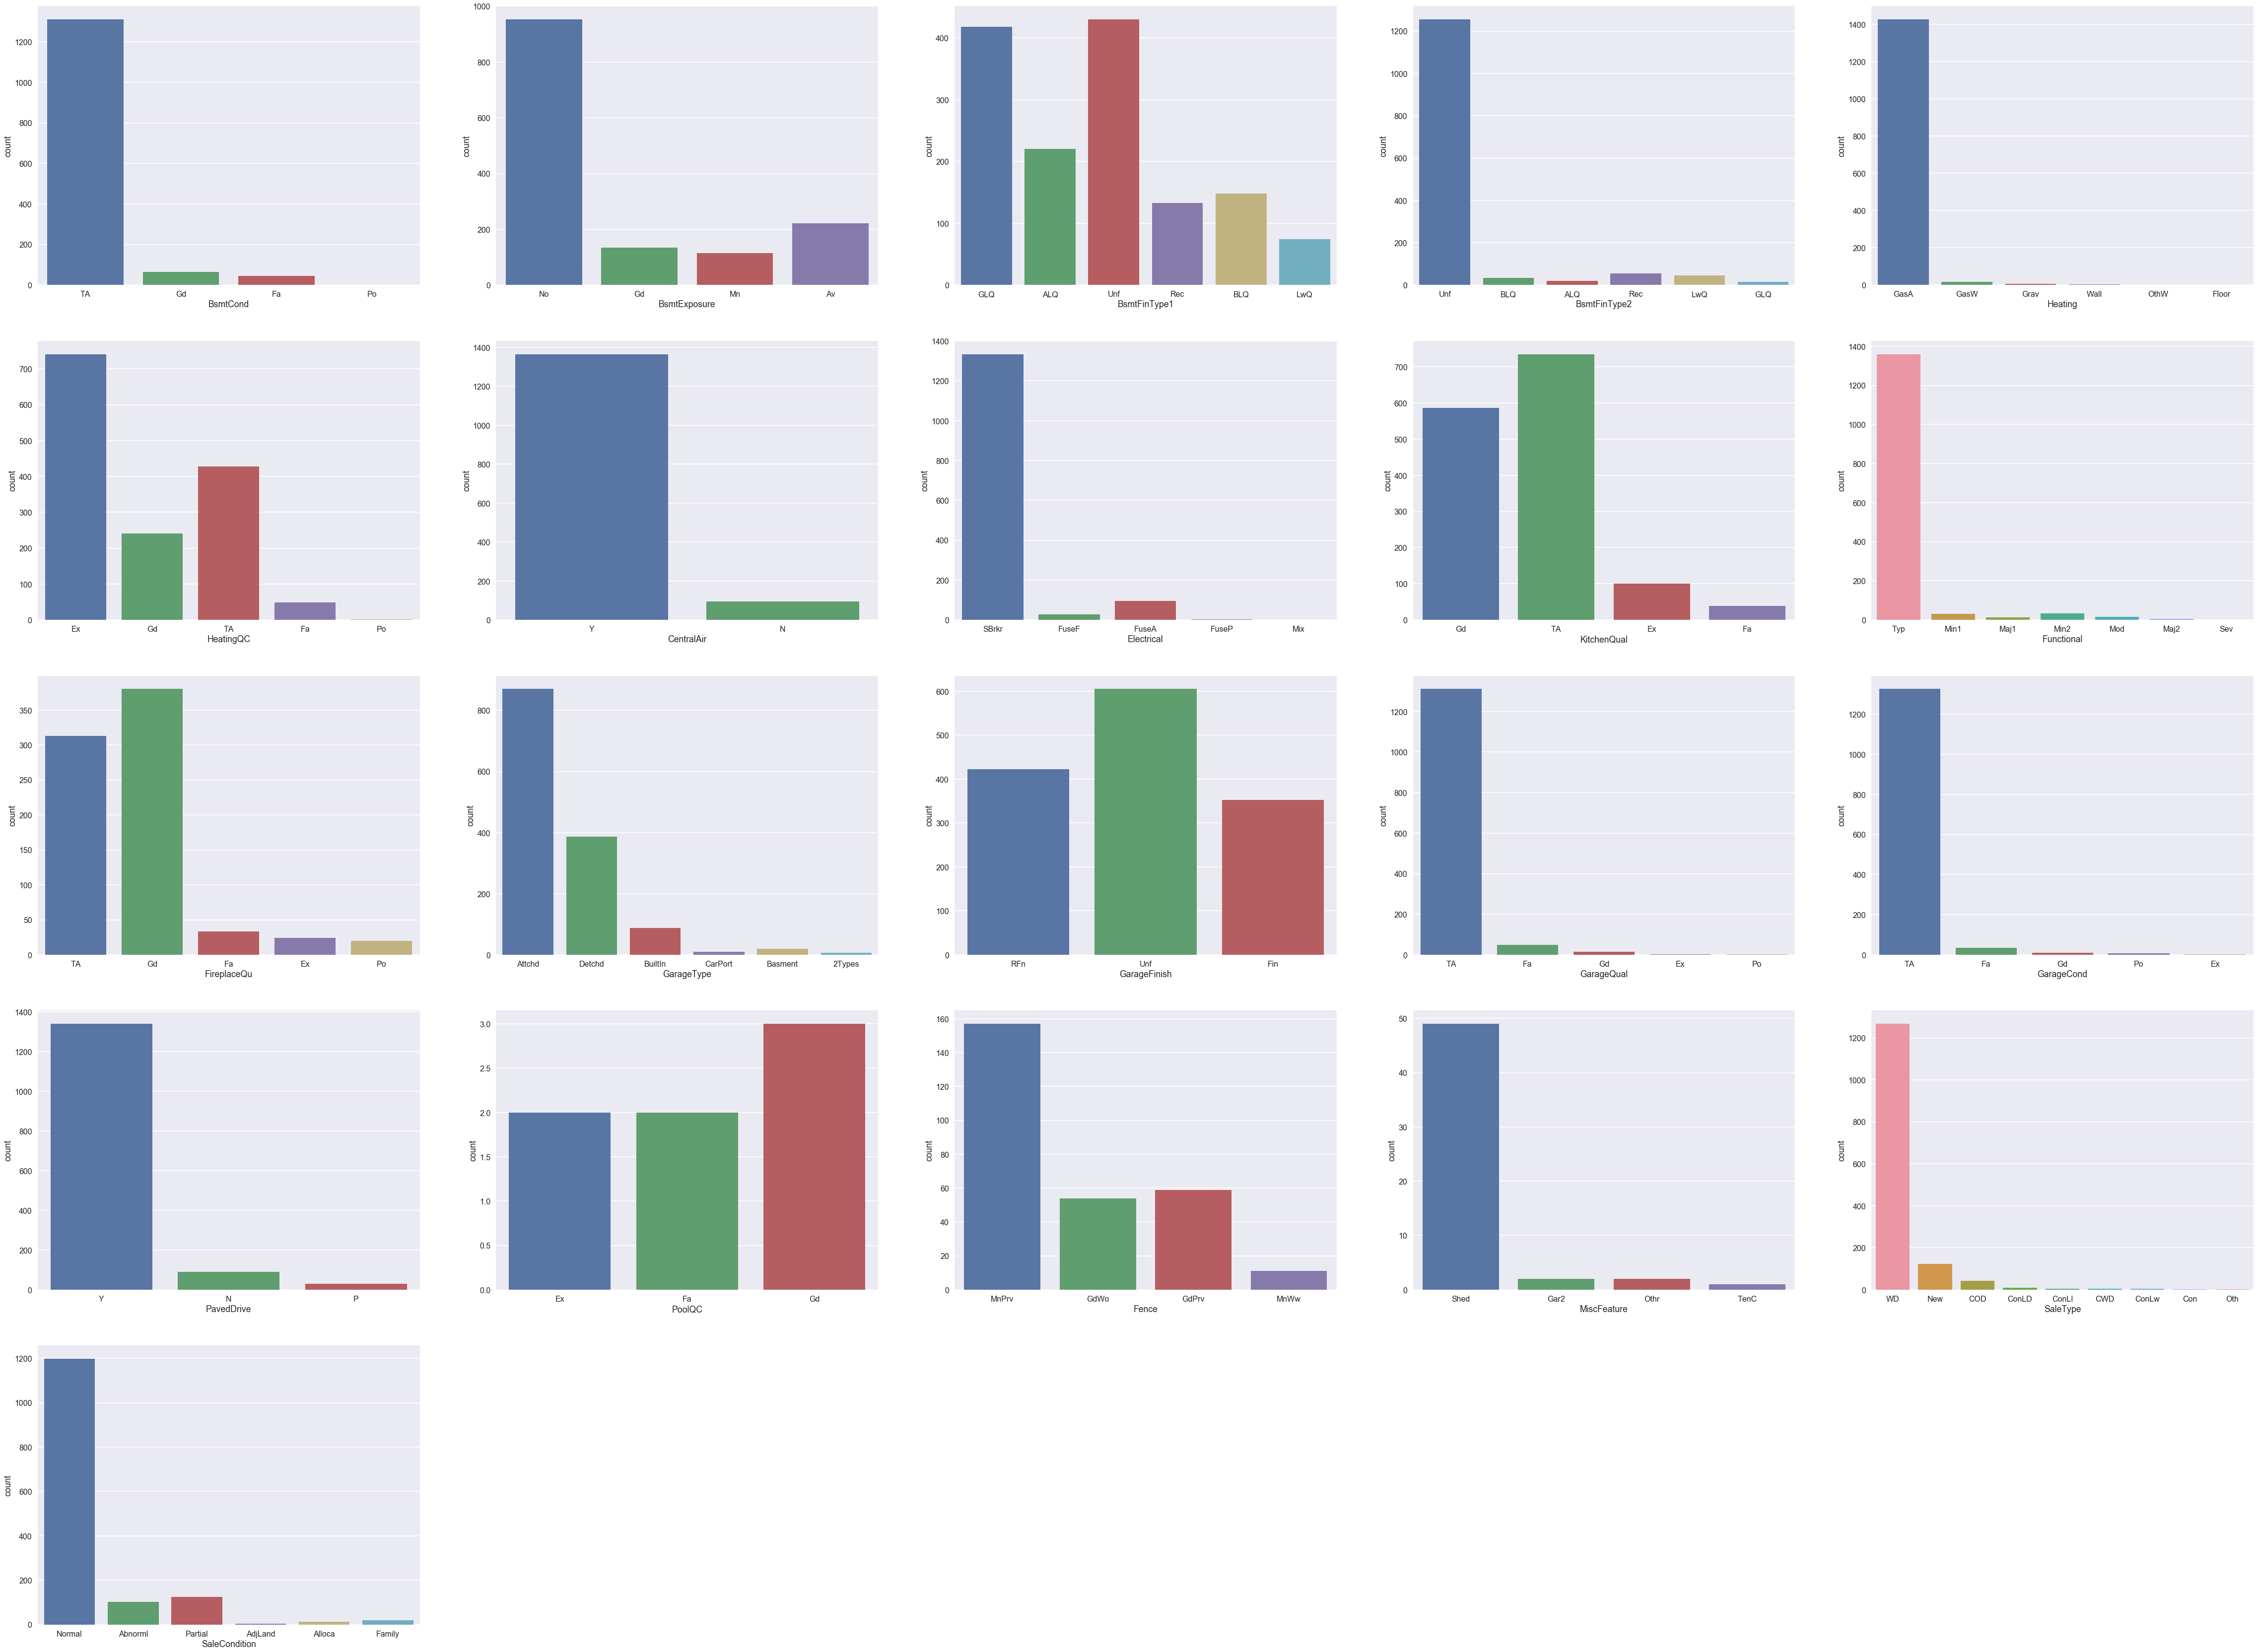

In [47]:
plt.figure(figsize=(80,60))
for i in range(22,43):
    plt.subplot(5,5,i-21)
    sns.countplot(df_categorical.iloc[:,i])

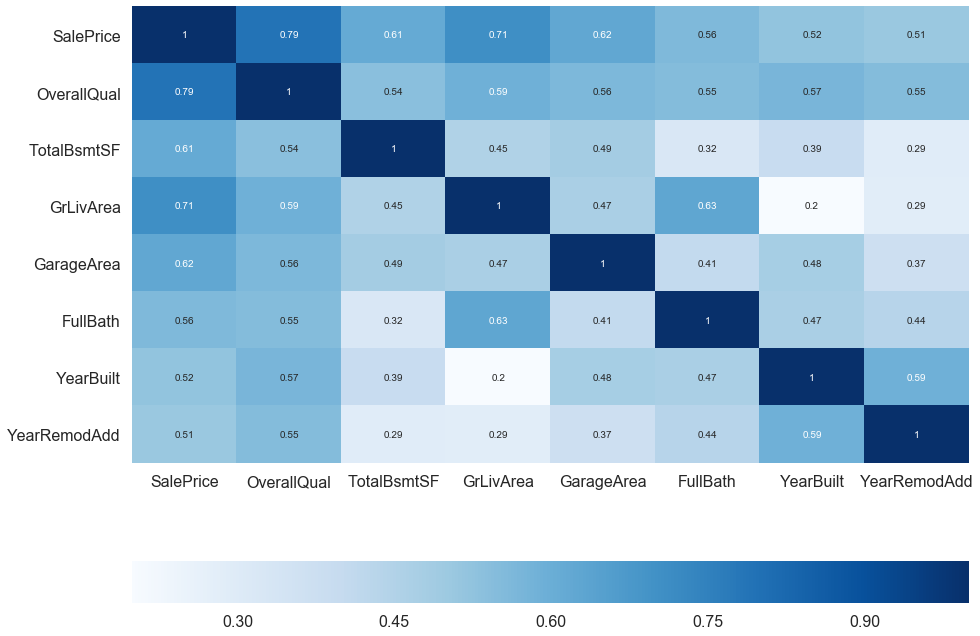

In [48]:
# Visulize the corrlation of features that could have good predictive power for SalePrice by intuitions
plt.figure(figsize=(15,12)) 
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.heatmap(df_train[columns].corr(),annot=True,cmap='Blues',cbar_kws={"orientation": "horizontal"})

## Data Cleaning

### Exam Some Features with too many missing values

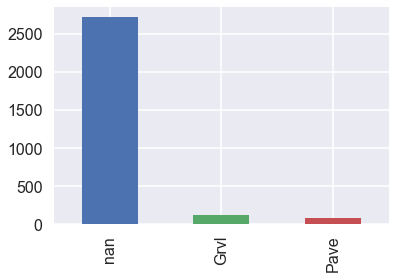

In [49]:
df.Alley.value_counts(dropna=False).plot(kind='bar')

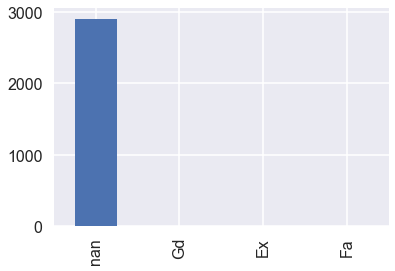

In [50]:
df.PoolQC.value_counts(dropna=False).plot(kind='bar')

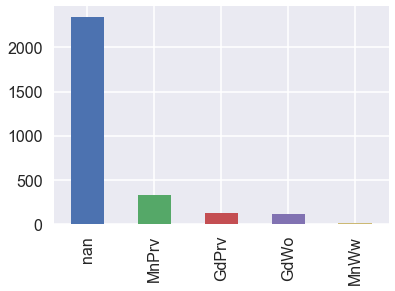

In [51]:
df.Fence.value_counts(dropna=False).plot(kind='bar')          

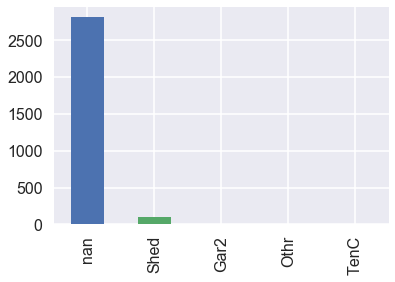

In [52]:
df.MiscFeature.value_counts(dropna=False).plot(kind='bar')

### Fill Missing Values

In [53]:
# According to the data description, some missing values mean "None" entry in the field.
# Try to fill them and dummy code them later
df.Alley.fillna('None',inplace=True)
df.PoolQC.fillna('None',inplace=True)
df.Fence.fillna('None',inplace=True)
df.MiscFeature.fillna('None',inplace=True)
df.GarageType.fillna('None',inplace=True)
df.GarageFinish.fillna('None',inplace=True)
df.GarageQual.fillna('None',inplace=True)
df.GarageCond.fillna('None',inplace=True)
df.BsmtQual.fillna('None',inplace=True)
df.BsmtCond.fillna('None',inplace=True)
df.BsmtExposure.fillna('None',inplace=True)
df.BsmtFinType1.fillna('None',inplace=True)
df.BsmtFinType2.fillna('None',inplace=True)
df.MasVnrType.fillna('None',inplace=True)
df.MSSubClass.fillna('None',inplace=True)
df.FireplaceQu.fillna('None',inplace=True)

In [54]:
# According to the data description, some missing values need to filled by 0
col=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
     'GarageYrBlt', 'GarageArea', 'GarageCars',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
     'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath',"MasVnrArea"]
for var in col:
    df[var] = df[var].fillna(0)

In [55]:
# Special Imputations by interacting with other fields or by the Mode
mode=['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType']
for var in mode:
    df[var]=df[var].fillna(df[var].mode()[0])

df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median())) # Median Imputation
df["Functional"] = df["Functional"].fillna("Typ")
df['Utilities']=df['Utilities'].fillna('AllPub')

In [56]:
np.sum(pd.isna(df).values) # Now, all fields are fully populated

0

## Feature Engineering and Model Fitting

In [57]:
# Age of house by the data it was sold
df['house_age']=df.YrSold-df.YearBuilt
# Age of garage by the data it was sold
df['garage_age']=df.YrSold-df.GarageYrBlt
# How long was the housed last added model
df['remod_time']=df.YrSold-df.YearRemodAdd

In [58]:
# Get rid of these year-related features
df.drop(['YrSold','YearBuilt','GarageYrBlt','YearRemodAdd'],axis=1,inplace=True)

In [59]:
# Convert some numerical variales to be catergorical by real world meanings
df['MSSubClass']=df.MSSubClass.astype('str')
df['OverallCond']=df.OverallCond.astype('str')

In [60]:
df.loc[(df['house_age']<0) | (df['garage_age']<0) | (df['remod_time']<0)]=0 # remove noise

In [61]:
df_sqr=df.loc[:,df.dtypes!='object']**2

In [62]:
df_sqr.columns=list(np.linspace(1,sum(df.dtypes!='object'),sum(df.dtypes!='object')))

In [63]:
df_log=np.log10(df.loc[:,df.dtypes!='object'])

In [64]:
df_log[df_log<0]=0
df_log.columns=list(np.linspace(34,66,33))

In [65]:
df=pd.concat([df,df_sqr],axis=1)
df=pd.concat([df,df_log],axis=1)
df.shape

(2919, 144)

In [66]:
train=df.iloc[:1460,:]
test=df.iloc[1460:,:]
SalePrice=df_train.SalePrice

In [67]:
train.shape

(1460, 144)

In [68]:
test.shape

(1459, 144)

In [69]:
# Detecting Outliers:

## Calculate the IQR Score
IQR=train.quantile(0.5)
Higher=train.quantile(0.999)
Lower=train.quantile(0.001)

In [70]:
ex_lower=(train[(IQR.index)]<Lower).any(1)

In [71]:
ex_higher=(train[(IQR.index)]>Higher).any(1)

In [72]:
train=train[-ex_lower]
train=train[-ex_higher]

In [73]:
train.shape

(1388, 144)

In [74]:
df=pd.concat([train,test])
df.shape

(2847, 144)

In [75]:
df=pd.get_dummies(df,drop_first=True)

In [76]:
train=df.iloc[:1388,:]
test=df.iloc[1388:,:]

In [77]:
SalePrice=SalePrice[train.index]

In [78]:
print(train.shape)
print(SalePrice.shape)
print(test.shape)

(1388, 386)
(1388,)
(1459, 386)


### Lasso

In [79]:
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV
from sklearn.linear_model import MultiTaskLasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [656]:
lasso=LassoCV(alphas=[0.5,1,100,1000,2000,3000],n_jobs=-1,random_state=100,cv=5)
lasso.fit(train,SalePrice)

LassoCV(alphas=[0.5, 1, 100, 1000, 2000, 3000], copy_X=True, cv=5, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
    normalize=False, positive=False, precompute='auto', random_state=100,
    selection='cyclic', tol=0.0001, verbose=False)

In [657]:
print('Best Alpha：',lasso.alpha_) 

Best Alpha： 100.0


In [658]:
mask = lasso.coef_ != 0
new_data = train.iloc[:,mask]
new_data.shape 

(1418, 135)

In [659]:
y_pred=lasso.predict(test)
result=pd.DataFrame()
result['Id']=pd.Series(df_test.index)
result['SalePrice']=pd.Series(y_pred)
result.to_csv('lasso_submission.csv')

### Random Forest Regressor

In [660]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
scale_train = sc_X.fit_transform(train)
scale_test = sc_X.transform(test)
sc_y = StandardScaler()
scale_SalePrice= sc_y.fit_transform(np.array(SalePrice).reshape(-1, 1))

In [661]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
rfr_full=RandomForestRegressor(n_jobs=-1, max_features='auto', oob_score=True, random_state=18)
param_grid= {
    "n_estimators" : [50, 100,150,200,250,300,400],
    "min_samples_leaf" :[int(len(train)/10), int(len(train)/20), int(len(train)/30),
                        int(len(train)/40),int(len(train)/50),int(len(train)/60),int(len(train)/70),int(len(train)/80),
                        int(len(train)/90),int(len(train)/100),int(len(train)/200),int(len(train)/300),int(len(train)/400)]  
}
CV_rfr_full = GridSearchCV(estimator=rfr_full, param_grid=param_grid)
CV_rfr_full.fit(scale_train,scale_SalePrice)
print(CV_rfr_full.best_params_)
print(CV_rfr_full.best_score_)

{'min_samples_leaf': 3, 'n_estimators': 400}
0.8830825799520083


In [662]:
# Variables Importance
importances = CV_rfr_full.best_estimator_.feature_importances_
imp_df = pd.DataFrame(importances)
imp_df.index = train.columns
imp_df.columns=['Relative_Importance']
imp_df.sort_values(by='Relative_Importance', ascending=False, inplace=True)

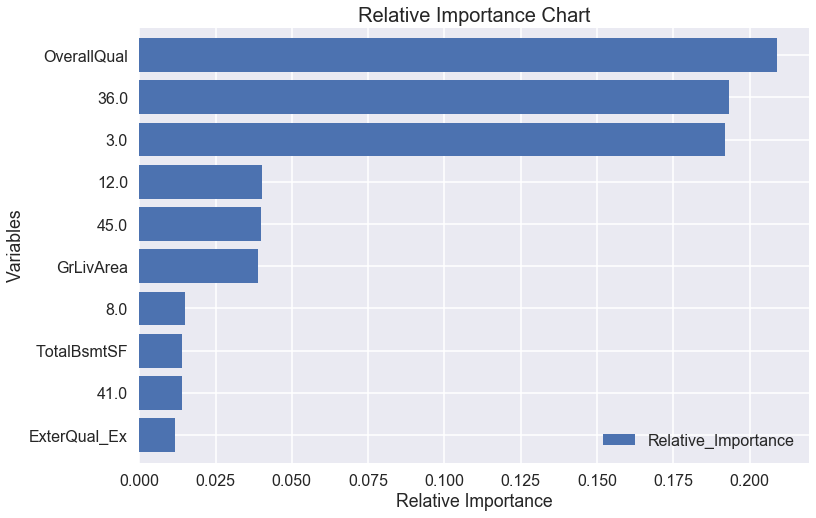

In [663]:
plt.figure(figsize=(8,5),dpi=90)
imp_df[:10].plot(kind='barh', width = 0.8,figsize=(12,8))
plt.gca().invert_yaxis()# flip the coordinates
plt.xlabel('Relative Importance')
plt.ylabel('Variables')
plt.title('Relative Importance Chart', fontsize = 20)
plt.show()

In [664]:
# Predicting a new result
y_pred=CV_rfr_full.predict(scale_test)
y_pred=sc_y.inverse_transform(y_pred)

In [665]:
result=pd.DataFrame()
result['Id']=pd.Series(df_test.index)
result['SalePrice']=pd.Series(y_pred)
result.to_csv('rf_submission.csv')

### XGBoost

In [80]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

In [61]:
model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='reg:gamma')
model.fit(train, SalePrice)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=160,
       n_jobs=1, nthread=None, objective='reg:gamma', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

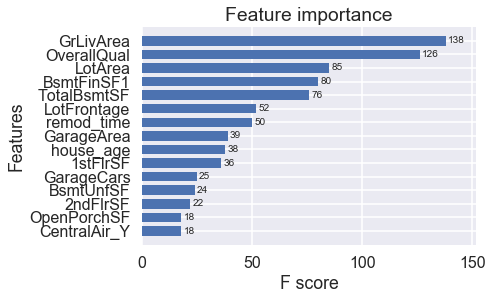

In [67]:
from xgboost import plot_importance
plot_importance(model,max_num_features=15,height=0.7)

In [84]:
xgbr = XGBRegressor(
 learning_rate =0.05,
 n_estimators=200,
 scale_pos_weight=1,
 seed=27,
 n_jobs=-1)

In [85]:
param_grid = {
 'max_depth':[1,3,5,7,8,9,10],
 'min_child_weight':list(range(1,6,2)),
 'gamma':[i/10.0 for i in range(0,5)],
 #'subsample':[i/100.0 for i in range(75,90,5)],
 #'colsample_bytree':[i/100.0 for i in range(75,90,5)],
 #'reg_alpha':[0.01,0.1, 1, 100]
}
CV_xgbr=GridSearchCV(xgbr,param_grid=param_grid,n_jobs=-1)
CV_xgbr.fit(train,SalePrice)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 3, 5, 7, 8, 9, 10], 'min_child_weight': [1, 3, 5], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
CV_xgbr.best_params_

{'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 3}

In [87]:
CV_xgbr.best_score_

0.9080041356841262

In [98]:
# Decrease the learning rate and increase the # of estimators
CV_xgbr = XGBRegressor(
 learning_rate =0.001,
 n_estimators=4000,
 scale_pos_weight=1,
 seed=27,
 colsample_bytree=0.75,
    gamma=0,
    max_depth=3,
    min_child_weight=3,
    reg_alpha=0.01,
    subsample=0.75,
    n_jobs=-1)
CV_xgbr.fit(train,SalePrice)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0, learning_rate=0.001,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=4000, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.75)

In [99]:
# Variables Importance
importances = CV_xgbr.feature_importances_
imp_df = pd.DataFrame(importances)
imp_df.index = train.columns
imp_df.columns=['Relative_Importance']
imp_df.sort_values(by='Relative_Importance', ascending=False, inplace=True)

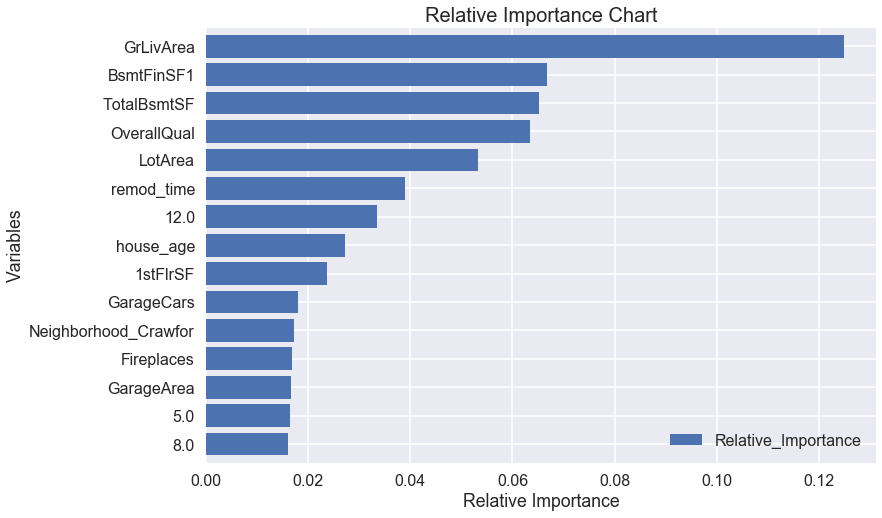

In [100]:
plt.figure(figsize=(8,5),dpi=90)
imp_df[:15].plot(kind='barh', width = 0.8,figsize=(12,8))
plt.gca().invert_yaxis()# flip the coordinates
plt.xlabel('Relative Importance')
plt.ylabel('Variables')
plt.title('Relative Importance Chart', fontsize = 20)
plt.show()

In [101]:
xgboost_pred=CV_xgbr.predict(test)
result=pd.DataFrame()
result['Id']=pd.Series(df_test.index)
result['SalePrice']=pd.Series(xgboost_pred)
result.to_csv('xgboost_submission.csv')
result.head()

,Id,SalePrice
0,1461,123241.007812
1,1462,153477.296875
2,1463,173671.234375
3,1464,179064.765625
4,1465,198159.593750


## Stacking Approach for Regression

In [102]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from xgboost.sklearn import XGBRegressor


''' Speficify all the base regressors '''

clfs = [
    
       XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0, learning_rate=0.001,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=4000, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.75),
    
        RandomForestRegressor(n_jobs=-1, max_features='sqrt',random_state=10,
                             min_samples_leaf=3,n_estimators=400),
        
       ]

''' Convert Original Pandas Data Frame to np.array '''

X=np.array(train)
X_predict=np.array(test)
y=np.array(SalePrice)

dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))

''' 5-fold stacking '''
n_folds = 5
skf = list(StratifiedKFold(y, n_folds))
for j, clf in enumerate(clfs):
    '''iterate each base regressor'''
    print(j, clf)
    dataset_blend_test_j = np.zeros((X_predict.shape[0], len(skf)))
    for i, (train_index, test_index) in enumerate(skf):
          
        X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]
        clf.fit(X_train, y_train)
        y_submission = clf.predict(X_test)
        dataset_blend_train[test_index, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict(X_predict)
        
    
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)
    


sc_X = StandardScaler()
dataset_blend_train = sc_X.fit_transform(dataset_blend_train)
dataset_blend_test = sc_X.transform(dataset_blend_test)
sc_y = StandardScaler()
y= sc_y.fit_transform(np.array(y).reshape(-1, 1))    
    

clf = SVR(C=8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

clf.fit(dataset_blend_train, y)
y_submission = clf.predict(dataset_blend_test)


y_submission=sc_y.inverse_transform(y_submission)


result=pd.DataFrame()
result['Id']=pd.Series(df_test.index)
result['SalePrice']=pd.Series(y_submission)
result.set_index('Id')
result.to_csv('stack_submission.csv')

/Users/zijianwang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0, learning_rate=0.001,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=4000, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.75)
1 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


In [103]:
y_submission

array([122682.89711844, 155704.46173158, 182144.18761707, ...,
       161951.61318332, 118635.00597329, 244737.32822469])

## Final Kaggle Competition Ranking

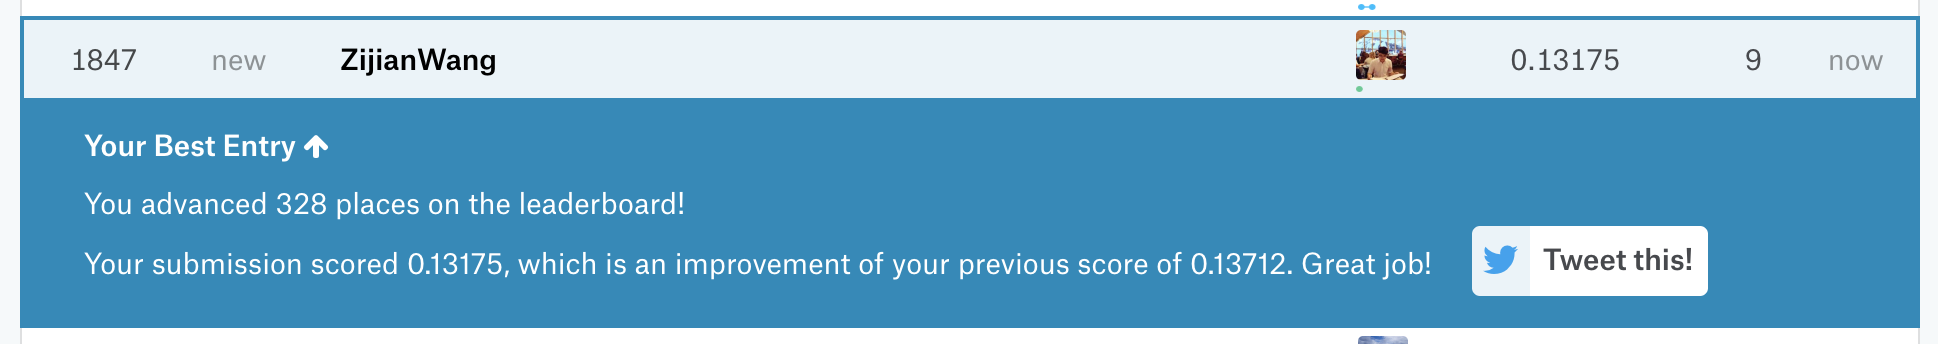

In [84]:
from IPython.display import Image
Image(filename = "Screen Shot 2018-10-26 at 12.24.35 AM.png", width=1000, height=300)

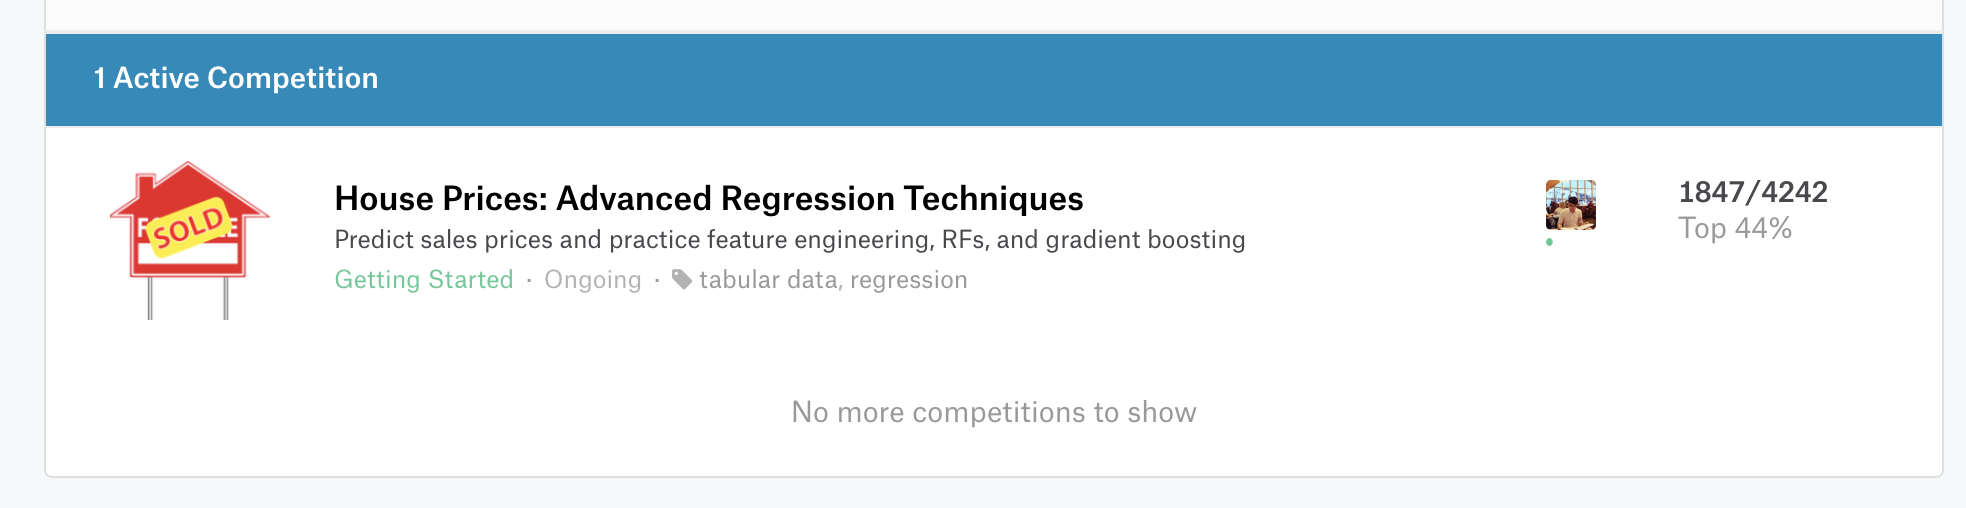

In [85]:
Image(filename = "Screen Shot 2018-10-26 at 12.25.00 AM.png", width=1000, height=300)